# STA 663 Midterm Exams

Please observe the Duke honor code for this **closed book** exam.

**Permitted exceptions to the closed book rule**

- You may use any of the links accessible from the Help Menu for reference - that is, you may follow a chain of clicks from the landing pages of the sites accessible through the Help Menu. If you find yourself outside the help/reference pages of `python`, `ipython`, `numpy`, `scipy`, `matplotlib`, `sympy`, `pandas`, (e.g. on a Google search page or stackoverflow or current/past versions of the STA 663 notes) you are in danger of violating the honor code and should exit immediately.

- You may also use TAB or SHIFT-TAB completion, as well as `?foo`, `foo?` and `help(foo)` for any function, method or class `foo`.

The total points allocated is 125, but the maximum possible is 100. Hence it is possible to score 100 even with some errors or incomplete solutions.

In [1]:
%matplotlib inline
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as la
from collections import Counter
from functools import reduce

**1**. (10 points)

Read the flights data at https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv into a `pnadas` data frame. Find the average number of passengers per quarter (Q1, Q2, Q3,Q4) across the years 1950-1959 (inclusive of 1950 and 1959), where

- Q1 = Jan, Feb, Mar
- Q2 = Apr, May, Jun
- Q3 = Jul, Aug, Sep
- Q4 = Oct, Nov, Dec

In [2]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv'
data = pd.read_csv(url)
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
mapper = {
    'January': 'Q1',
    'February': 'Q1',
    'March': 'Q1',
    'April': 'Q2',
    'May': 'Q2',
    'June': 'Q2',
    'July': 'Q3',
    'August': 'Q3',
    'September': 'Q3',
    'October': 'Q4',
    'November': 'Q4',
    'December': 'Q4',   
}

data = data.replace({'month': mapper})
data = data[(data.year >= 1950) & (data.year <= 1959)]
data.groupby('month')[['passengers']].mean()

,passengers
month,
Q1,245.800000
Q2,278.466667
Q3,329.666667
Q4,250.366667


**2**. (10 points)

The Collatz sequence is defined by the following rules for finding the next number

```
if the current number is even, divide by 2
if the current number is odd, multiply by 3 and add 1
if the current number is 1, stop
```

- Find the starting integer that gives the longest Collatz sequence for integers in the range(1, 10000). What is the starting number and length of this Collatz sequence?

In [4]:
def collatz(n):
    """Collatz sequence."""
    vals = [n]
    while n != 1:
        if n % 2 == 0:
            n //= 2
        else:
            n = 3*n + 1
        vals.append(n)
    return vals

In [5]:
max(((n, len(collatz(n))) for n in range(1, 10000)), key=lambda x: x[1])

(6171, 262)

**3**. (10 points)

Recall that a covariance matrix is a matrix whose entries are

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/4df2969e65403dd04f2c64137d21ff59b5f54190)

Find the sample covariance matrix of the 4 features of the **iris** data set at http://bit.ly/2ow0oJO using basic `numpy` operations on `ndarrasy`. Do **not** use the `np.cov` or equivalent functions in `pandas` (except for checking). Remember to scale by $1/(n-1)$ for the sample covariance.

In [6]:
url = 'http://bit.ly/2ow0oJO'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = iris.values[:, :4].astype('float')

In [8]:
X -= X.mean(axis=0)

In [9]:
(X.T @ X)/(X.shape[0]-1)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [10]:
np.cov(X, rowvar=False)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

**4**. (10 points)

How many numbers in `range(100, 1000)` are divisible by 17 after you square them and add 1? Find this out using only **lambda** functions, **map**, **filter** and **reduce** on `xs`, where `xs = range(100, 10000)`.

In pseudo-code, you want to achieve

```python
xs = range(100, 10000)
count(y for y in (x**2 + 1 for x in xs) if y % 17 == 0)
```

In [11]:
xs = range(100, 10000)

In [12]:
reduce(lambda a, b: a + b, 
       map(lambda x: 1, 
           filter(lambda x: x % 17 == 0, 
                  map(lambda x: x**2+1, xs))))

1164

**5**. (20 points)

- Given the DNA sequence below, create a $4 \times 4$ transition matrix $A$ where $A[i,j]$ is the probability of the base $j$ appearing immediately after base $i$. Note that a *base* is one of the four letters `a`, `c`, `t` or `g`. The letters below should be treated as a single sequence, broken into separate lines just for formatting purposes. You should check that row probabilities sum to 1. (10 points)
- Find the steady state distribution of the 4 bases from the row stochastic transition matrix - that is the, the values of $x$ for which $x^TA = x$ (You can solve this as a set of linear equations). Hint: you need to add a constraint on the values of $x$. (10 points)

```
gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct
```

In [13]:
dna = ''.join('''gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct'''.split())

d = {}
for i, j in zip(dna[:], dna[1:]):
    d[(i, j)] = d.get((i, j), 0) + 1
d

{('a', 'a'): 5,
 ('a', 'c'): 11,
 ('a', 'g'): 24,
 ('a', 't'): 13,
 ('c', 'a'): 14,
 ('c', 'c'): 20,
 ('c', 'g'): 28,
 ('c', 't'): 22,
 ('g', 'a'): 24,
 ('g', 'c'): 31,
 ('g', 'g'): 72,
 ('g', 't'): 37,
 ('t', 'a'): 10,
 ('t', 'c'): 22,
 ('t', 'g'): 39,
 ('t', 't'): 27}

In [14]:
A = np.array([[d[(i, j)] for j in 'actg'] for i in 'actg'])
A

array([[ 5, 11, 13, 24],
       [14, 20, 22, 28],
       [10, 22, 27, 39],
       [24, 31, 37, 72]])

In [15]:
A = A / A.sum(axis=1)[:, None]
A

array([[0.09433962, 0.20754717, 0.24528302, 0.45283019],
       [0.16666667, 0.23809524, 0.26190476, 0.33333333],
       [0.10204082, 0.2244898 , 0.2755102 , 0.39795918],
       [0.14634146, 0.18902439, 0.22560976, 0.43902439]])

In [16]:
A.sum(axis=1)

array([1., 1., 1., 1.])

### Solution using least squares

In [17]:
A1 = np.r_[A.T - np.eye(4), [[1,1,1,1]]]
A1

array([[-0.90566038,  0.16666667,  0.10204082,  0.14634146],
       [ 0.20754717, -0.76190476,  0.2244898 ,  0.18902439],
       [ 0.24528302,  0.26190476, -0.7244898 ,  0.22560976],
       [ 0.45283019,  0.33333333,  0.39795918, -0.56097561],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [18]:
b = np.r_[0,0,0,0,1].reshape(-1,1)

In [19]:
np.linalg.lstsq(A1, b, rcond=None)[0]

array([[0.1327228 ],
       [0.21062262],
       [0.24825335],
       [0.40840123]])

### Alternative solution using eigendecomposition

In [20]:
e, v = np.linalg.eig(A.T)
e, v

(array([ 1.        , -0.04809275,  0.08184718,  0.01321502]),
 array([[ 0.24629088,  0.80307077,  0.07979585, -0.57531671],
        [ 0.39084793, -0.10897781, -0.4285091 , -0.37179859],
        [ 0.46067847, -0.12086218, -0.43769407,  0.67636642],
        [ 0.7578615 , -0.57323077,  0.78640732,  0.27074888]]))

In [21]:
s = v[:, 0] / v[:, 0].sum()
s.reshape(-1,1)

array([[0.1327228 ],
       [0.21062262],
       [0.24825335],
       [0.40840123]])

**6**. (10 points)

- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](./vecs.png)

In [22]:
theta = 30 * np.pi/180

r = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

In [23]:
s = np.diag([3, 0.5])

In [24]:
m = r @ s

In [25]:
minv = np.diag(1/np.diag(s)) @ r.T

In [26]:
m

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [27]:
m1 = m @ np.eye(2)

In [28]:
m1

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [29]:
m2 = minv @ m1

In [49]:
la.inv(m1)

array([[ 0.28867513,  0.16666667],
       [-1.        ,  1.73205081]])

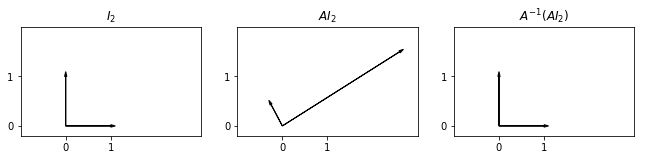

In [30]:
plt.figure(figsize=(11, 2))

plt.subplot(131)
plt.axis([-1, 3, -0.2, 2])
for v in np.eye(2).T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$I_2$')

plt.subplot(132)
plt.axis([-1, 3, -0.2, 2])
for v in m1.T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$AI_2$')
    
plt.subplot(133)
plt.axis([-1, 3, -0.2, 2])
for v in m2.T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$A^{-1}(AI_2)$')
plt.savefig('vecs.png')
pass

**7**. (55 points) 

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` (10 points)
2. solving the normal equations $X^TX \beta = X^Ty$ (10 points)
3. using `scipy.linalg.svd` (10 points)
4. using gradient descent with RMSProp (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (25 points)

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [31]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [32]:
def f(beta, x):
    """Model function."""
    
    return beta[0]*x**2 + beta[1]*x**3 + beta[2]*np.sin(x)

### Using `lstsq`

In [33]:
X = np.c_[x**2, x**3, np.sin(x)]

In [34]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [35]:
beta

array([ 2.99259014, -0.19883227, 10.20024689])

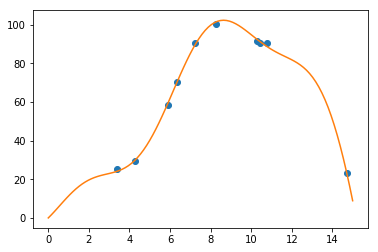

In [36]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

### Using normal equations

In [37]:
beta = np.linalg.solve(X.T @ X, X.T @ y)
beta

array([ 2.99259014, -0.19883227, 10.20024689])

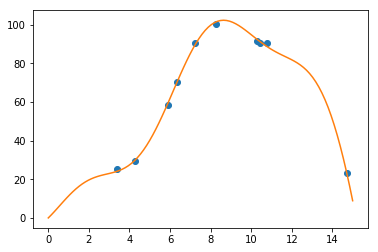

In [38]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

### Using SVD

In [39]:
U, s, Vt = np.linalg.svd(X)
beta = Vt.T @ np.diag(1/s) @ U[:, :len(s)].T @ y.reshape(-1,1)
beta

array([[ 2.99259014],
       [-0.19883227],
       [10.20024689]])

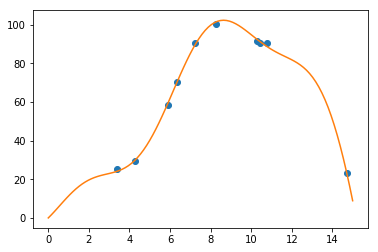

In [40]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

### Using gradient descent with RMSprop

In [41]:
def res(beta, x, y):
    """Resdiual funciton."""
    return f(beta, x) - y

In [42]:
def grad(beta, x, y):
    """Gradient of function."""
    
    return np.array([
        np.sum(x**2 * res(beta, x, y)),
        np.sum(x**3 * res(beta, x, y)),
        np.sum(np.sin(x) * res(beta, x, y))
    ])

In [43]:
def gd(beta, x, y, f, grad, alpha=0.01):
    """Gradient descent."""
    
    v = 0
    for i in range(10000):
        v = 0.9 * v + 0.1 * grad(beta, x, y)**2 
        beta = beta - (alpha * grad(beta, x, y))/(np.sqrt(v) + 1e-8)
    return beta

In [44]:
beta = gd(np.array([1,1,1]), x, y, f, grad)
beta

array([ 2.99759014, -0.19383227, 10.20524689])

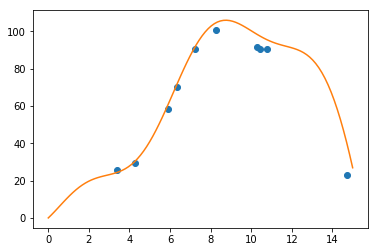

In [45]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass